In [1]:
from math import log

In [2]:
# 计算熵
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt = shannonEnt - prob * log(prob, 2)
    return shannonEnt

In [3]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [4]:
myDat, labels = createDataSet()

In [5]:
myDat

In [6]:
labels

In [7]:
calcShannonEnt(myDat)

In [8]:
# 熵越高，则混合的数据也越多，我们可以在数据集中添加更多的分类，观察熵是如何变化的。
# 这里我们增加第三个名为'maybe'的分类，测试熵的变化：
myDat[0][-1] = 'maybe'
myDat

In [9]:
calcShannonEnt(myDat)

## 划分数据集

In [10]:
# append 与 extend 区别
a = [1, 2, 3]
b = [4, 5, 6]
a.append(b)
a

In [11]:
a = [1, 2, 3]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [12]:
# 划分数据集：以特征axis进行划分，返回划分后的结果集
# 参数：待划分的数据集、划分数据集的特征、特征的返回值
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet

In [13]:
myDat, labels = createDataSet()

In [14]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [15]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [16]:
splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no']]

In [17]:
# 寻找最好的特征划分，返回特征值
# 在 函 数 中 调 用 的 数 据 需 要 满 足 一 定 的 要 求 ： 第 一 个 要 求 是 ， 数 据 必 须 是 一 种 由 列 表 
# 元 素 组 成 的 列 表 ， 而 且 所 有 的 列 表 元 素 都 要 具 有 相 同 的 数 据 长 度 ；第 二 个 要 求 是 ，数 
# 据 的 最 后 一 列 或 者 每 个 实 例 的 最 后 一 个 元 素 是 当 前 实 例 的 类 别 标 签 。数 据 集 一 旦 满 足 
# 上 述 要 求 ，我 们 就 可 以 在 函 数 的 第 一 行 判 定 当 前 数 据 集 包 含 多 少 特 征 属 性 。我 们 无 需 
# 限 定 list 中 的 数 据 类 型 ， 它 们 既 可 以 是 数 字 也 可 以 是 字 符 串 ， 并 不 影 响 实 际 计 算 。
def chooseBestFeatureTooSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1  # 特征总数
    baseEntropy = calcShannonEnt(dataSet)  # 原始香农熵
    bestInfoGain = 0.0  # 当前最好香农熵
    bestFeature = -1  # 特征量
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]  # 提取第一个特征的所有特征值
        uniqueVals = set(featList) # 去重
        newEntropy = 0.0  # 特征 i 的信息熵，注意特征 i 的每个值的熵应该计算比例
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy = newEntropy + prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy  # 当前最好的熵与新熵的差值
        if infoGain > bestInfoGain:  # 差值越大说明该划分越好，更新熵值和特征量
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [18]:
myDat, labels = createDataSet()

In [19]:
chooseBestFeatureTooSplit(myDat)

0

## 递归构建决策树

In [20]:
import operator

In [21]:
# 多数表决：当特征属性划分完时仍不能确定类标签时使用
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount, key=operator.itemgetter(0), reverse=True)
    return sortedClassCount[0]

In [22]:
# 递归创建树
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]  # 提取特征列
    
    if classList.count(classList[0]) == len(classList): # 若剩下的都是同一类别则直接返回标签值
        return classList[0]
    if len(dataSet[0]) == 1:  # 若特征遍历完仍未完成划分，则返回出现次数最多的标签值
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureTooSplit(dataSet)
    bestFeatLabel = labels[bestFeat]  # 根据最好的特征找到特征标签
    myTree = {bestFeatLabel:{}}
    del labels[bestFeat]  # 删除该特征标签
    
    featValues = [example[bestFeat] for example in dataSet]  # 提取该特征的所有属性值
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [23]:
myDat, labels = createDataSet()

In [24]:
myTree = createTree(myDat, labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 绘制树形图

In [25]:
import matplotlib.pyplot as plt

In [26]:
# 下面定义树节点格式的常量
decisionNode = dict(boxstyle='sawtooth', fc='0.8')
leafNode = dict(boxstyle='round4', fc='0.8')
arrow_args = dict(arrowstyle='<-')

In [27]:
# 执行实际绘图功能
# 该函数需要一个绘图区，该区域由全局变量 createPlot.ax1 定义
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt,
                           xy=parentPt,
                           xycoords='axes fraction',
                           xytext=centerPt,
                           textcoords='axes fraction',
                           va='center',
                           ha='center',
                           bbox=nodeType,
                           arrowprops=arrow_args)

def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

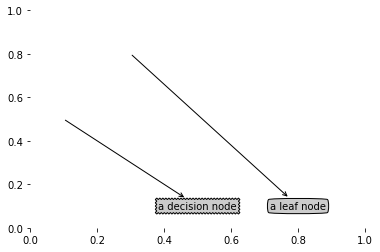

In [28]:
createPlot()

In [29]:
# 获取所有叶节点数目
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]  # 得到当前节点的所有孩子节点中的第一个
    secondDict = myTree[firstStr]  # 得到 firstStr 节点的所有子树（字典类型）
    for key in secondDict.keys():  # 遍历所有子节点（包括递归遍历子树子节点）
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

# 获取树的层数（不计算根节点）
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [30]:
# 返回预设树
def retrieveTree(i):
    listOfTree = [{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1 : {'flippers': {0: {'head': {0: 'no',
                  1: 'yes'}}, 1: 'no'}}}}]
    return listOfTree[i]

In [31]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [32]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [33]:
getNumLeafs(myTree)

3

In [34]:
getTreeDepth(myTree)

2

In [50]:
# 在父节点间添加文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)
    
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.x0ff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, 
              plotTree.y0ff)
    plotMidText (cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.y0ff = plotTree.y0ff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.x0ff = plotTree.x0ff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.x0ff, plotTree.y0ff),
                    cntrPt, leafNode)
            plotMidText((plotTree.x0ff, plotTree.y0ff), cntrPt, str(key))
    plotTree.y0ff = plotTree.y0ff + 1.0 / plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.x0ff = -0.5 / plotTree.totalW
    plotTree.y0ff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

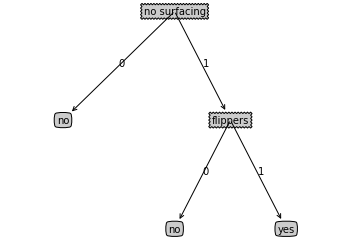

In [51]:
myTree = retrieveTree(0)
createPlot(myTree)

In [46]:
myTree['no surfacing'][3] = 'maybe'
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

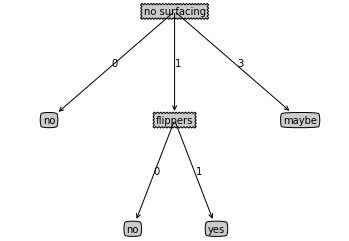

In [47]:
createPlot(myTree)

## 测试分类

In [67]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]  # 得到当前树的根节点
    secondDict = inputTree[firstStr]  # 获取根节点下的子树集合
    featIndex = featLabels.index(firstStr)  # 将标签转化为索引
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [68]:
myDat, labels = createDataSet()
labels

['no surfacing', 'flippers']

In [69]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [70]:
classify(myTree, labels, [1, 0])

'no'

In [71]:
classify(myTree, labels, [1, 1])

'yes'

## 树的存储

In [79]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [80]:
storeTree(myTree, 'classifierStorage.txt')

In [81]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# 示例：使用决策树预测隐形眼镜类型

In [84]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [87]:
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'young': 'hard',
        'presbyopic': 'no lenses'}},
      'myope': 'hard'}},
    'no': {'age': {'pre': 'soft',
      'young': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft',
        'myope': 'no lenses'}}}}}}}}

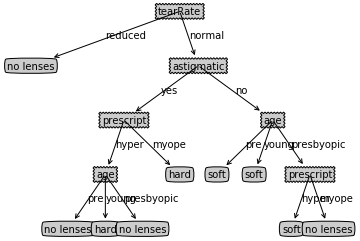

In [88]:
createPlot(lensesTree)